**About Dataset**  

**Problem Statement**  

You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

**Task**  
Given a person’s credit-related information, build a machine learning model that can classify the credit score.

ID: Represents a unique identification of an entry  
Customer_ID: Represents a unique identification of a person  
Month: Represents the month of the year  
Name: Represents the name of a person  
Age: Represents the age of the person  
SSN: Represents the social security number of a person  
Occupation: Represents the occupation of the person  
Annual_Income: Represents the annual income of the person  
Monthly_Inhand_Salary: Represents the monthly base salary of a person  
Num_Bank_Accounts: Represents the number of bank accounts a person holds  
Num_Credit_Card: Represents the number of other credit cards held by a person  
Interest_Rate: Represents the interest rate on credit card  
Num_of_Loan: Represents the number of loans taken from the bank  
Type_of_Loan: Represents the types of loan taken by a person  
Delay_from_due_date: Represents the average number of days delayed from the payment date  
Num_of_Delayed_Payment: Represents the average number of payments delayed by a person  
Changed_Credit_Limit: Represents the percentage change in credit card limit  
Num_Credit_Inquiries: Represents the number of credit card inquiries  
Credit_Mix: Represents the classification of the mix of credits  
Outstanding_Debt: Represents the remaining debt to be paid  
Credit_Utilization_Ratio: Represents the utilization ratio of credit card  
Credit_History_Age: Represents the age of credit history of the person  
Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person  
Total_EMI_per_month: Represents the monthly EMI payments  
Amount_invested_monthly: Represents the monthly amount invested by the customer  
Payment_Behaviour: Represents the payment behavior of the customer  
Monthly_Balance:Represents the monthly balance amount of the customer  
Credit_Score:Represents the bracket of credit score (Poor, Standard, Good) ((Target))  

# Table of Contents
- [1. Loading libraries and data](#1-Loading-libraries-and-data)
- [2. Preprocessing and Handle invalid data](#2.-Preprocessing-and-Handle-invalid-data)
- [3. EDA](#3-EDA)
- [4. OHE](#4.-OHE)
- [5. Spliting Data](#5.-Spliting-Data)
- [6. Balancing data](#6.-Balancing-data)
- [7. Modeling](#section-3)
 - [7.1 Split after smote](#7.1-Split-after-smote)
 - [7.2 Random Forrest](#7.2-Random-Forrest)
 - [7.3 XGboost](#7.3-XGboost)
 - [7.4 Decision Three](#7.4-Decision-Three)
 - [7.5 Catboost](#7.4-Catboost)
- [Conclusion](#section-3)

# 1. Loading libraries and data

In [1]:
# Importing libraries


import os
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import gc
from sklearn.metrics import classification_report, make_scorer, mean_squared_error 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.utils import resample
from matplotlib.ticker import FuncFormatter
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt


import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV , train_test_split, TimeSeriesSplit 
from sklearn import datasets
from sklearn.metrics import f1_score, recall_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRegressor
import catboost as cb
import xgboost as xgb

from fancyimpute import IterativeImputer,KNN

from sklearn.impute import KNNImputer

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV

plt.style.use('dark_background')

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings("ignore")

In [2]:
# Loading Data

df = pd.read_csv('train.csv', sep=",", encoding="utf-8")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [4]:
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [5]:
# Convert table headings to lower case

df.columns = df.columns.str.lower()

In [6]:
df.isna().sum()

id                              0
customer_id                     0
month                           0
name                         9985
age                             0
ssn                             0
occupation                      0
annual_income                   0
monthly_inhand_salary       15002
num_bank_accounts               0
num_credit_card                 0
interest_rate                   0
num_of_loan                     0
type_of_loan                11408
delay_from_due_date             0
num_of_delayed_payment       7002
changed_credit_limit            0
num_credit_inquiries         1965
credit_mix                      0
outstanding_debt                0
credit_utilization_ratio        0
credit_history_age           9030
payment_of_min_amount           0
total_emi_per_month             0
amount_invested_monthly      4479
payment_behaviour               0
monthly_balance              1200
credit_score                    0
dtype: int64

In [7]:
df.duplicated().sum()

0

# 2. Preprocessing and Handle invalid data

In [8]:
# Check unique variables

for _ in df.columns:
    print(_)
    print(df[_].unique())
    print('_______________________________________________________________________________________________')

id
['0x1602' '0x1603' '0x1604' ... '0x25feb' '0x25fec' '0x25fed']
_______________________________________________________________________________________________
customer_id
['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']
_______________________________________________________________________________________________
month
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']
_______________________________________________________________________________________________
name
['Aaron Maashoh' nan 'Rick Rothackerj' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']
_______________________________________________________________________________________________
age
['23' '-500' '28_' ... '4808_' '2263' '1342']
_______________________________________________________________________________________________
ssn
['821-00-0265' '#F%$D@*&8' '004-07-5839' ... '133-16-7738' '031-35-0942'
 '078-73-5990']
_________________________________________________

In [9]:
# We see a lot of mistakes in data. Let's try to fix them

# Age

df['age'].value_counts()

age
38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
471        1
1520       1
8663       1
3363       1
1342       1
Name: count, Length: 1788, dtype: int64

In [10]:
def f_filter(value):
    if '-' in value:
        return value.split('-')[1]
    elif '_' in value:
        return value.split('_')[0]
    else:
        return value

In [11]:
df['age'] = df['age'].apply(f_filter)
df['age'] = df['age'].astype('int')

In [12]:
for i in range(len(df['age'])):
    if df['age'][i] > 75 or df['age'][i] < 18:
        df['age'][i] = np.nan
    else:
        df['age'][i] = df['age'][i]

In [13]:
df['age']=df['age'].fillna(df["age"].median())

In [14]:
# occupation

df['occupation'] = df['occupation'].replace('_______', np.nan)

In [15]:
# annual_income

df['annual_income'] = df['annual_income'].apply(f_filter)
df['annual_income'] = df['annual_income'].astype('float64')

In [16]:
# num_bank_accounts

for i in range(len(df['num_bank_accounts'])):
    if df['num_bank_accounts'][i]>25:
        df['num_bank_accounts'][i] = np.nan
    else:
        df['num_bank_accounts'][i] = df['num_bank_accounts'][i]

In [17]:
df["num_bank_accounts"]=df["num_bank_accounts"].replace(-1,0)

In [18]:
# interest rate

df['interest_rate'].value_counts()

interest_rate
8       5012
5       4979
6       4721
12      4540
10      4540
        ... 
4995       1
1899       1
2120       1
5762       1
5729       1
Name: count, Length: 1750, dtype: int64

In [19]:
for i in range(len(df['interest_rate'])):
    if df['interest_rate'][i]>100:
        df['interest_rate'][i] = np.nan
    else:
        df['interest_rate'][i] = df['interest_rate'][i]

In [20]:
# num_of_loan

df['num_of_loan'] = df['num_of_loan'].apply(f_filter)
df['num_of_loan'] = df['num_of_loan'].astype('int64')

In [21]:
for i in range(len(df['num_of_loan'])):
    if df['num_of_loan'][i] > 100:
        df['num_of_loan'][i] = np.nan
    else:
        df['num_of_loan'][i] = df['num_of_loan'][i]

In [22]:
# delay_from_due_date

for i in range(len(df['delay_from_due_date'])):
    if df['delay_from_due_date'][i]<0:
        df['delay_from_due_date'][i] = 0
    else:
        df['delay_from_due_date'][i] = df['delay_from_due_date'][i]

In [23]:
# num_of_delayed_payment

def n_filter(value):
    if '_' in str(value):
        return value.split('_')[0]
    else:
        return value

In [24]:
df['num_of_delayed_payment'] = df['num_of_delayed_payment'].apply(n_filter)
df['num_of_delayed_payment'] = df['num_of_delayed_payment'].astype('Int64')

In [25]:
# changed_credit_limit

df['changed_credit_limit'] = df['changed_credit_limit'].replace('_', np.nan)
df['changed_credit_limit'] = df['changed_credit_limit'].astype('float64')


df['changed_credit_limit'] = df['changed_credit_limit'].fillna(df['changed_credit_limit'].median())
df['changed_credit_limit'] = df['changed_credit_limit'].round(2)

In [26]:
# credit_mix

df['credit_mix'] = df['credit_mix'].replace('_', np.nan)

In [27]:
# outstanding_debt

df['outstanding_debt'] = df['outstanding_debt'].apply(f_filter)
df['outstanding_debt'] = df['outstanding_debt'].astype('float64')

In [28]:
# credit_history_age

years  = []
months = []
for i in df["credit_history_age"]:
    if i is np.nan:
        years.append(np.nan)
        months.append(np.nan)
    else:
        new_str = i.lower().split()
        years_ = int(new_str[0])
        months_ = int(new_str[new_str.index('and')+1])
        years.append(years_)
        months.append(months_)
df['credit_age_year'] = pd.Series(years)
df['credit_age_months'] = pd.Series(months) 
df.drop('credit_history_age',axis=1,inplace=True)

In [29]:
# amount_invested_monthly

df['amount_invested_monthly'].value_counts()

amount_invested_monthly
__10000__             4305
0.0                    169
80.41529543900253        1
36.66235139442514        1
89.7384893604547         1
                      ... 
36.541908593249026       1
93.45116318631192        1
140.80972223052834       1
38.73937670100975        1
167.1638651610451        1
Name: count, Length: 91049, dtype: int64

In [30]:
df['amount_invested_monthly'] = df['amount_invested_monthly'].replace('__10000__', np.nan)
df['amount_invested_monthly'] = df['amount_invested_monthly'].astype('float64')

In [31]:
# payment_behaviour

df['payment_behaviour'].value_counts()

payment_behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

In [32]:
df['payment_behaviour'] = df['payment_behaviour'].replace('!@9#%8', np.nan)

In [33]:
df['payment_behaviour'].ffill(inplace=True)

In [34]:
# monthly_balance

df['monthly_balance']=df['monthly_balance'].replace('__-333333333333333333333333333__',np.nan)
df['monthly_balance']=df['monthly_balance'].astype("float64")
df['monthly_balance']=df['monthly_balance'].fillna(df["monthly_balance"].mean())

In [35]:
df['credit_score'].value_counts()

credit_score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [36]:
df['credit_score'] = df['credit_score'].replace('Standard', 1)
df['credit_score'] = df['credit_score'].replace('Poor', 0)
df['credit_score'] = df['credit_score'].replace('Good', 2)

df['credit_score'] = df['credit_score'].astype('float64')

In [37]:
df = df.drop(columns=['name', 'id', 'ssn', 'customer_id'])

In the code above, we corrected the values that seemed inadequate to us and would interfere with the further execution of the assigned task.

In [38]:
df

,month,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,...,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,credit_age_year,credit_age_months
0,January,23.0,Scientist,19114.12,1824.843333,3.0,4,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2.0,22.0,1.0
1,February,23.0,Scientist,19114.12,NaN,3.0,4,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,2.0,NaN,NaN
2,March,34.0,Scientist,19114.12,NaN,3.0,4,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,2.0,22.0,3.0
3,April,23.0,Scientist,19114.12,NaN,3.0,4,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,2.0,22.0,4.0
4,May,23.0,Scientist,19114.12,1824.843333,3.0,4,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,2.0,22.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,25.0,Mechanic,39628.99,3359.415833,4.0,6,7.0,2.0,"Auto Loan, and Student Loan",...,502.38,34.663572,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,0.0,31.0,6.0
99996,May,25.0,Mechanic,39628.99,3359.415833,4.0,6,7.0,2.0,"Auto Loan, and Student Loan",...,502.38,40.565631,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,0.0,31.0,7.0
99997,June,25.0,Mechanic,39628.99,3359.415833,4.0,6,NaN,2.0,"Auto Loan, and Student Loan",...,502.38,41.255522,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,0.0,31.0,8.0
99998,July,25.0,Mechanic,39628.99,3359.415833,4.0,6,7.0,2.0,"Auto Loan, and Student Loan",...,502.38,33.638208,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,1.0,31.0,9.0


In [39]:
# Check categorial columns

cat_col = []
for col in df.columns:
    if df[col].dtype == 'object':
        cat_col.append(col)

In [40]:
num_col = [i for i in df.columns.values[2:] if i not in cat_col]

In [41]:
# fill numerical features
imputer = KNNImputer(n_neighbors=5)

In [42]:
df[num_col] = imputer.fit_transform(df[num_col])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   month                     100000 non-null  object 
 1   age                       100000 non-null  float64
 2   occupation                92938 non-null   object 
 3   annual_income             100000 non-null  float64
 4   monthly_inhand_salary     100000 non-null  float64
 5   num_bank_accounts         100000 non-null  float64
 6   num_credit_card           100000 non-null  float64
 7   interest_rate             100000 non-null  float64
 8   num_of_loan               100000 non-null  float64
 9   type_of_loan              88592 non-null   object 
 10  delay_from_due_date       100000 non-null  float64
 11  num_of_delayed_payment    100000 non-null  float64
 12  changed_credit_limit      100000 non-null  float64
 13  num_credit_inquiries      100000 non-null  fl

In [44]:
# fill categorial features

# credit mix

df['credit_mix']=df['credit_mix'].replace("Standard",1)
df['credit_mix']=df['credit_mix'].replace("Bad",2)
df['credit_mix']=df['credit_mix'].replace("Good",3)

imputer = IterativeImputer(max_iter=10, random_state=12345)
mix = df['credit_mix'].values.reshape(-1, 1)
df['credit_mix'] = imputer.fit_transform(mix)

In [45]:
df['occupation'].ffill(inplace=True)

In [46]:
df["type_of_loan"] = df["type_of_loan"].fillna(df["type_of_loan"].ffill())

# 3. EDA

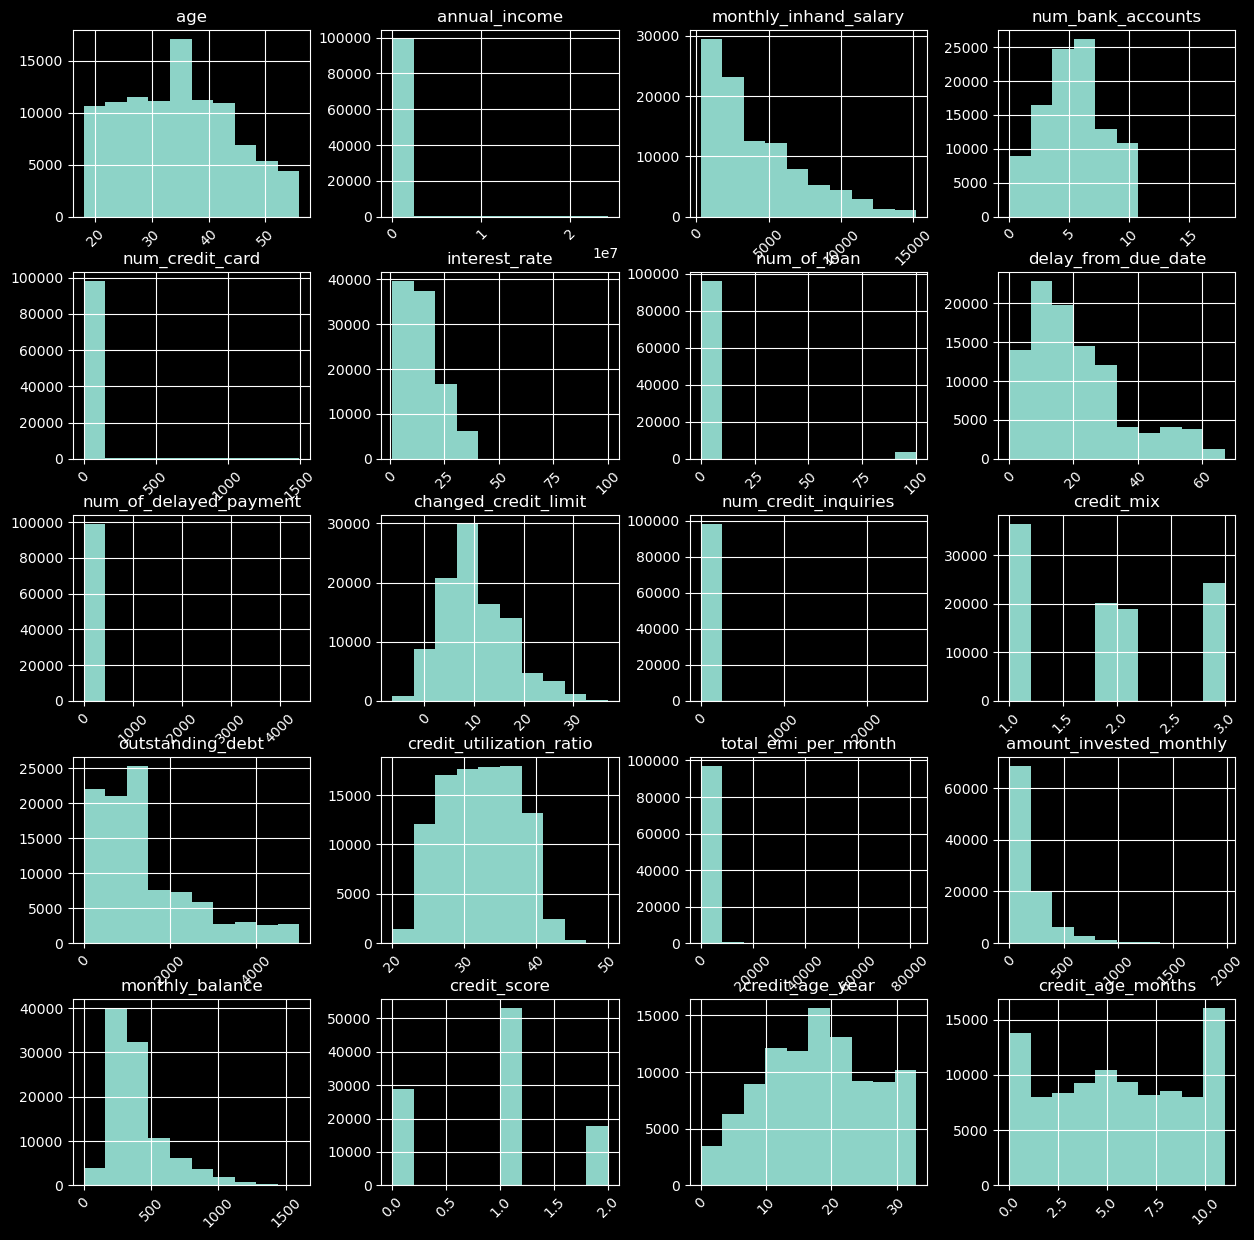

In [47]:
df.hist(figsize=(15,15), xrot=45)
plt.show()

Text(0, 0.5, 'age')

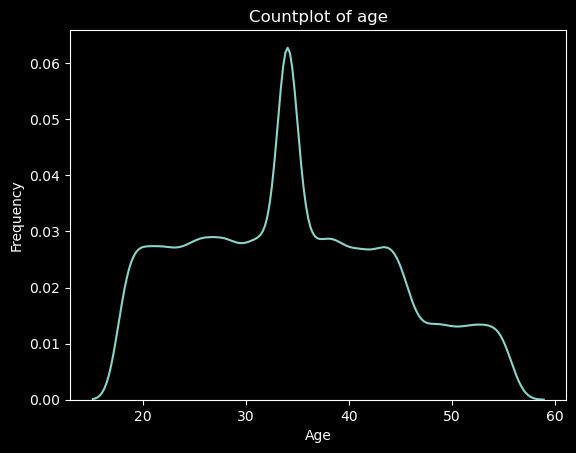

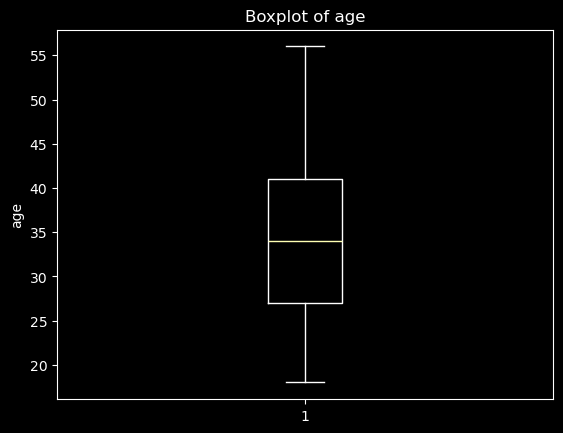

In [48]:
# Let's look at the age distribution

sns.kdeplot(df['age'])
plt.title('Countplot of age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Create a boxplot
plt.figure()
plt.boxplot(df['age'])
plt.title('Boxplot of age')
plt.ylabel('age')

As we can see from the graphs above, the main population of people is represented between the ages of 20 and 45 years

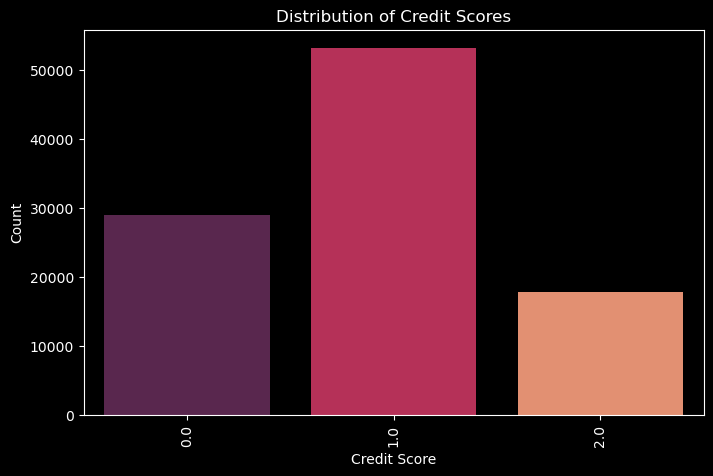

In [49]:
# Let's look at the target distribution

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='credit_score', palette='rocket')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.title('Distribution of Credit Scores')
plt.xticks(rotation=90)  
plt.show()

From this graph we can conclude that our target is imbalanced. More than half of the population has a standard credit rating. However, we also see that there are fewer people with a good credit rating than with a bad one. We will return to this later when we deal with data imbalance

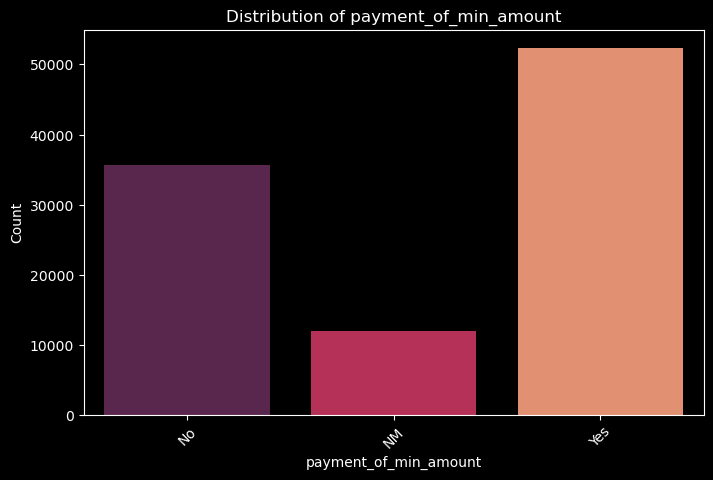

In [50]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='payment_of_min_amount', palette='rocket')
plt.xlabel('payment_of_min_amount')
plt.ylabel('Count')
plt.title('Distribution of payment_of_min_amount')
plt.xticks(rotation=45)  
plt.show()

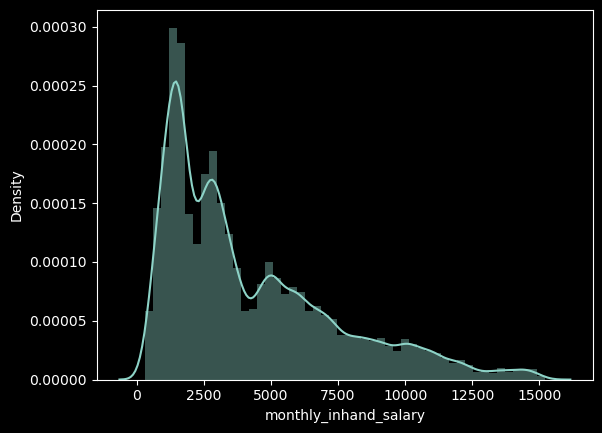

In [51]:
sns.distplot(df['monthly_inhand_salary']);

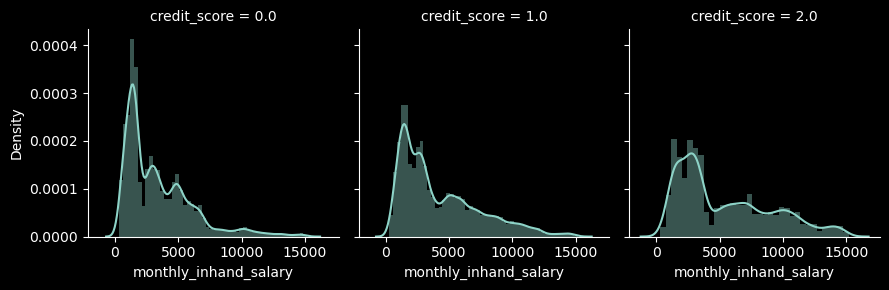

In [52]:
gr_1 = sns.FacetGrid(df, col='credit_score')
gr_1.map(sns.distplot, 'monthly_inhand_salary')

In [53]:
df.dtypes

month                        object
age                         float64
occupation                   object
annual_income               float64
monthly_inhand_salary       float64
num_bank_accounts           float64
num_credit_card             float64
interest_rate               float64
num_of_loan                 float64
type_of_loan                 object
delay_from_due_date         float64
num_of_delayed_payment      float64
changed_credit_limit        float64
num_credit_inquiries        float64
credit_mix                  float64
outstanding_debt            float64
credit_utilization_ratio    float64
payment_of_min_amount        object
total_emi_per_month         float64
amount_invested_monthly     float64
payment_behaviour            object
monthly_balance             float64
credit_score                float64
credit_age_year             float64
credit_age_months           float64
dtype: object

In [54]:
df[num_col]

,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,total_emi_per_month,amount_invested_monthly,monthly_balance,credit_score,credit_age_year,credit_age_months
0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,26.822620,49.574949,80.415295,312.494089,2.0,22.0,1.0
1,19114.12,1493.906333,3.0,4.0,3.0,4.0,0.0,6.4,11.27,4.0,809.98,31.944960,49.574949,118.280222,284.629162,2.0,19.6,5.8
2,19114.12,1659.374833,3.0,4.0,3.0,4.0,3.0,7.0,9.40,4.0,809.98,28.609352,49.574949,81.699521,331.209863,2.0,22.0,3.0
3,19114.12,1493.906333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,31.377862,49.574949,199.458074,223.451310,2.0,22.0,4.0
4,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,6.6,11.27,4.0,809.98,24.797347,49.574949,41.420153,341.489231,2.0,22.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.50,3.0,502.38,34.663572,35.104023,60.971333,479.866228,0.0,31.0,6.0
99996,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.50,3.0,502.38,40.565631,35.104023,54.185950,496.651610,0.0,31.0,7.0
99997,39628.99,3359.415833,4.0,6.0,6.6,2.0,27.0,6.0,11.50,3.0,502.38,41.255522,35.104023,24.028477,516.809083,0.0,31.0,8.0
99998,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,4.0,11.50,3.0,502.38,33.638208,35.104023,251.672582,319.164979,1.0,31.0,9.0


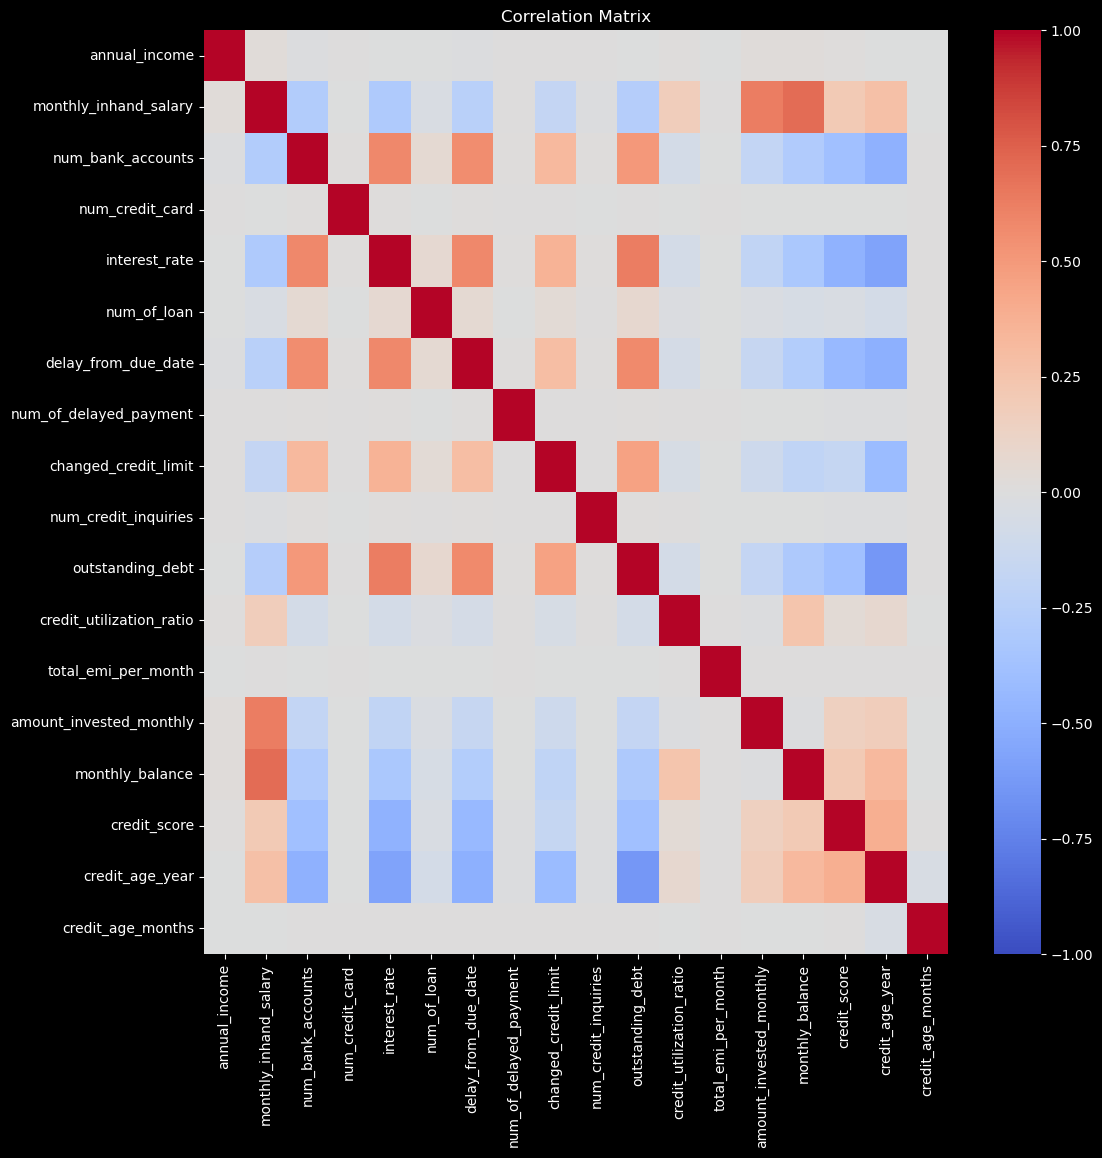

In [55]:
# correlation matrix

correlation_matrix = df[num_col].corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Matrix')

plt.show()

As a result of constructing the correlation matrix, we were convinced that there was no multicollinearity in the provided data

# 4. OHE

In [56]:
scaler = StandardScaler()

ohe = OneHotEncoder(handle_unknown='ignore')
transformed = ohe.fit_transform(df[cat_col])

In [57]:
transformed_df = pd.DataFrame(transformed.toarray(), columns=ohe.get_feature_names_out(cat_col))

In [58]:
df = pd.concat([df.drop(cat_col, axis=1),transformed_df], axis=1)

In [59]:
df.shape

(100000, 6315)

# 5. Spliting Data

In [60]:
X = df.drop(['credit_score'], axis=1)
y = df['credit_score']

In [61]:
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=.25, random_state=12345)

In [62]:
print(X_train.shape) 
print(x_test.shape)

(75000, 6314)
(25000, 6314)


# 6. Balancing data

In [63]:
smote = SMOTE(k_neighbors=5)
X_train_sm,Y_train_sm=smote.fit_resample(X_train,Y_train)

In [64]:
df_after_sm = pd.DataFrame(X_train_sm, columns=X_train_sm.columns)
df_after_sm['target'] = Y_train_sm 

# 7. Modeling

## 7.1 Split after smote

In [65]:
X = df_after_sm.drop(['target'], axis=1)
Y = df_after_sm['target']

In [66]:
scaling = StandardScaler()
X = scaling.fit_transform(X)

In [67]:
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=.25, random_state=12345)

## 7.2 Random Forrest

In [68]:
rf = RandomForestClassifier(n_estimators=500, random_state=12345)
model_rf = rf.fit(X_train, Y_train)
predict_rf = model_rf.predict(x_test)
cr_rf = classification_report(y_test, predict_rf)
recall = recall_score(y_test, predict_rf, average='macro')  
print(f"Recall: {recall:.2f}")
print('\n\n Classification Report\n')
print(cr_rf)

Recall: 0.82


 Classification Report

              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82      9925
         1.0       0.82      0.71      0.76      9901
         2.0       0.80      0.92      0.86     10030

    accuracy                           0.82     29856
   macro avg       0.82      0.82      0.81     29856
weighted avg       0.82      0.82      0.81     29856



# 7.3 XGboost

In [69]:
model = XGBClassifier(seed=42, n_estimators=500, max_depth=15, learning_rate=0.2)

model_xgbc = model.fit(X_train, Y_train)
predict_xgbc = model_xgbc.predict(x_test)

cr_xgbc = classification_report(y_test, predict_xgbc)
recall = recall_score(y_test, predict_xgbc, average='macro')  
print(f"Recall: {recall:.2f}")
print('\n\n Classification Report\n')
print(cr_xgbc)

Recall: 0.86


 Classification Report

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      9925
         1.0       0.81      0.80      0.81      9901
         2.0       0.90      0.92      0.91     10030

    accuracy                           0.86     29856
   macro avg       0.86      0.86      0.86     29856
weighted avg       0.86      0.86      0.86     29856



## 7.4 Decision Three

In [70]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=12345)

model_dtc = model.fit(X_train, Y_train)
predict_dtc = model_dtc.predict(x_test)

cr_dtc = classification_report(y_test, predict_dtc)
recall_dtc = recall_score(y_test, predict_dtc, average='macro')  
print(f"Recall: {recall_dtc:.2f}")
print('\n\n Classification Report\n')
print(cr_dtc)

Recall: 0.77


 Classification Report

              precision    recall  f1-score   support

         0.0       0.81      0.73      0.77      9925
         1.0       0.72      0.72      0.72      9901
         2.0       0.78      0.85      0.81     10030

    accuracy                           0.77     29856
   macro avg       0.77      0.77      0.77     29856
weighted avg       0.77      0.77      0.77     29856



## 7.5 CatBoost

In [71]:
model = cb.CatBoostClassifier(iterations=1000, learning_rate=0.01, depth=6, loss_function='MultiClass', random_state=12345, verbose=False)

In [72]:
model_cb = model.fit(X_train, Y_train)

predict_cb = model_cb.predict(x_test)

cr_cb = classification_report(y_test, predict_cb)
recall_cb = recall_score(y_test, predict_cb, average='macro')
print(f"Recall: {recall_cb:.2f}")
print('\n\n Classification Report\n')
print(cr_cb)

Recall: 0.77


 Classification Report

              precision    recall  f1-score   support

         0.0       0.80      0.74      0.77      9925
         1.0       0.77      0.68      0.72      9901
         2.0       0.75      0.88      0.81     10030

    accuracy                           0.77     29856
   macro avg       0.77      0.77      0.77     29856
weighted avg       0.77      0.77      0.77     29856



## Conclusion 

We received a dataset with banking information related to credit information for individuals. As a result of the work, the bank's management wanted to obtain a model that would automatically determine the credit rating of an individual based on this information. During the process, we first assessed the data and worked on data cleaning. There were a lot of gaps in the data as well as errors in the data. I have done work to correct these errors. Next, we preprocessed the data. Target data was imbalanced in the original dataset. We also carried out work to balance these data. Next, 4 models were trained on the prepared data: Random Forest, Decision Tree, XG Boost, Catboost. Based on the model training results, we see that the XG Boost model has the highest recall rate and is equal to 0.86, which means that in 86% of cases the model correctly predicts a credit rating based on the received financial information. The F1 metric is also the highest for the XG Boost model and was also 0.86, which also indicates that the model works correctly in 86% of cases. The model also learned faster than all the others. We recommend using this model in the future.